In [10]:
!pip install yfinance pandas matplotlib


Question 1 : Extracting Tesla Stock DataUsing yfinance


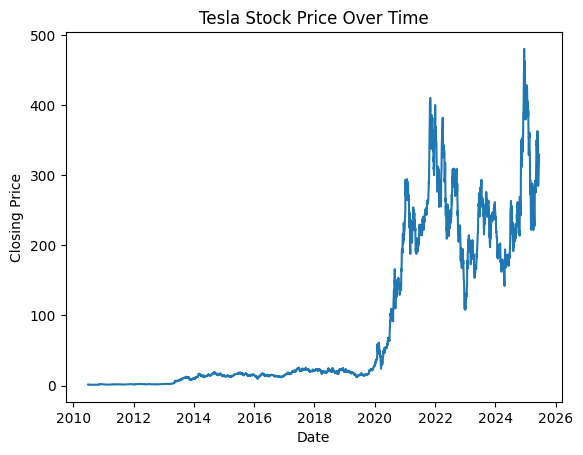

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Get Tesla stock data
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')

# Plot  prices
plt.plot(tesla_data.index, tesla_data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Price Over Time')
plt.show()

Question 2 - Extracting Tesla Revenue Data Using Webscraping


In [5]:
import requests
from bs4 import BeautifulSoup

url = 'https://companiesmarketcap.com/tesla/revenue/'

response = requests.get(url)


soup = BeautifulSoup(response.text, 'html.parser')
header = soup.find('h3', text='Annual revenue')

if header:
  data_container = header.find_next_sibling()
  print(data_container.text)







Year
Revenue
Change



2025 (TTM) $95.72 B-2.01%2024 $97.69 B0.95%2023 $96.77 B18.8%2022 $81.46 B51.35%2021 $53.82 B70.67%2020 $31.53 B28.31%2019 $24.57 B14.52%2018 $21.46 B82.51%2017 $11.75 B67.98%2016 $7.00 B73.01%2015 $4.04 B26.5%2014 $3.19 B58.85%2013 $2.01 B387.23%2012 $0.41 B102.34%2011 $0.20 B74.95%2010 $0.11 B4.29%2009 $0.11 B 




<ipython-input-5-3004212218>:10: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  header = soup.find('h3', text='Annual revenue')


Question 3 - Extracting GameStop Stock Data Using yfinance


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


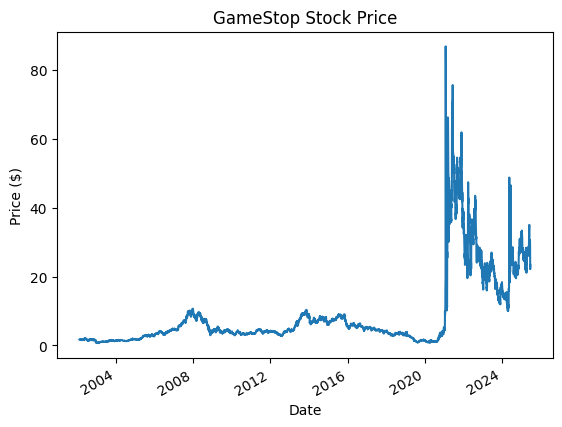

In [6]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period='max')
print(gme_data.head())

import matplotlib.pyplot as plt

gme_data['Close'].plot(title='GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()


Question 4 Extracting GameStop Revenue Data Using Webscraping - 1 Points


In [7]:
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://companiesmarketcap.com/gamestop/revenue/'


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

header = soup.find('h3', text='Annual revenue')

if header:
    data_container = header.find_next_sibling()
    raw_text = data_container.text

#regex
    pattern = r'(\d{4}( \(TTM\))?) \$([\d\.]+) B([-\d\.]+%)'
    matches = re.findall(pattern, raw_text)

    data_list = []
    for match in matches:
        year = match[0]
        revenue = match[2] + ' B'
        change = match[3]
        data_list.append({'Year': year, 'Revenue': revenue, 'Change': change})

    df = pd.DataFrame(data_list)

    print(df)
else:
    print("Could not find the 'Annual revenue' section in the page.")

          Year Revenue   Change
0   2025 (TTM)  3.82 B       0%
1         2024  3.82 B   -27.5%
2         2023  5.27 B  -11.04%
3         2022  5.92 B   -1.39%
4         2021  6.01 B   18.09%
5         2020  5.08 B  -21.28%
6         2019  6.46 B  -17.55%
7         2018  7.84 B  -14.98%
8         2017  9.22 B    7.16%
9         2016  8.60 B   -8.07%
10        2015  9.36 B    0.73%
11        2014  9.29 B    2.84%
12        2013  9.03 B    1.72%
13        2012  8.88 B   -6.95%
14        2011  9.55 B    0.81%
15        2010  9.47 B    4.36%
16        2009  9.07 B    3.09%
17        2008  8.80 B   24.13%
18        2007  7.09 B   33.37%
19        2006  5.31 B   72.03%
20        2005  3.09 B   67.78%
21        2004  1.84 B   16.72%
22        2003  1.57 B   16.71%
23        2002  1.35 B   20.66%


<ipython-input-7-2006273322>:12: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  header = soup.find('h3', text='Annual revenue')


Question 5 - Tesla Stock and Revenue Dashboard - 2 Points


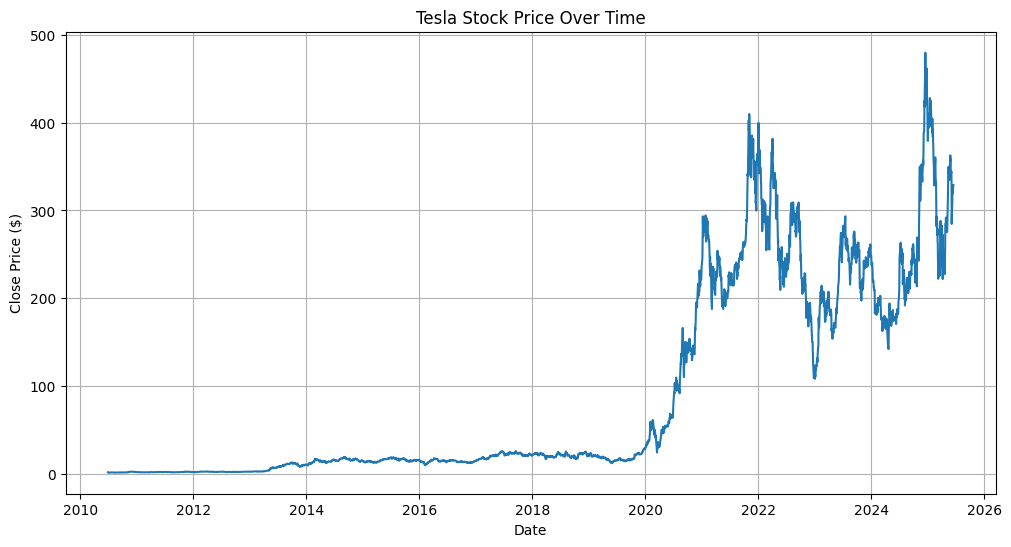

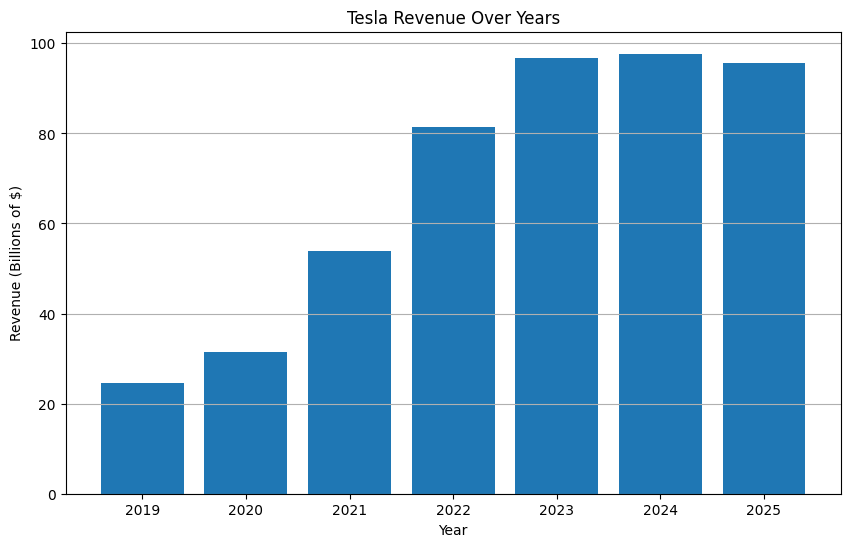

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Stock
tesla = yf.Ticker('TSLA')
tesla_stock = tesla.history(period='max')
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock.index, tesla_stock['Close'])
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.show()

# revenue

revenue_data = {
    'Year': [2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Revenue ($B)': [24.57, 31.53, 53.82, 81.46, 96.77, 97.69, 95.72]
}
df_revenue = pd.DataFrame(revenue_data)
plt.figure(figsize=(10, 6))
plt.bar(df_revenue['Year'], df_revenue['Revenue ($B)'])
plt.title('Tesla Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue (Billions of $)')
plt.grid(axis='y')
plt.show()

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points


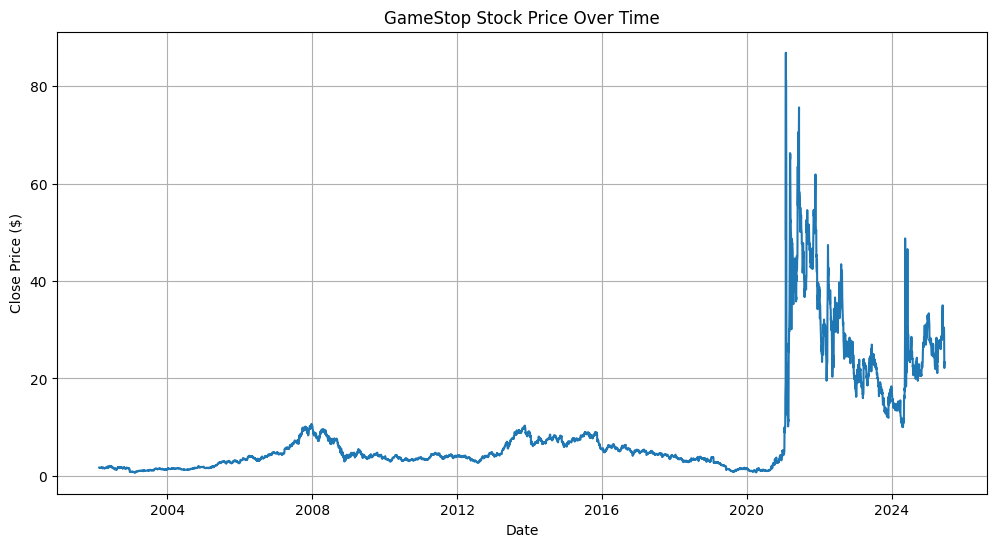

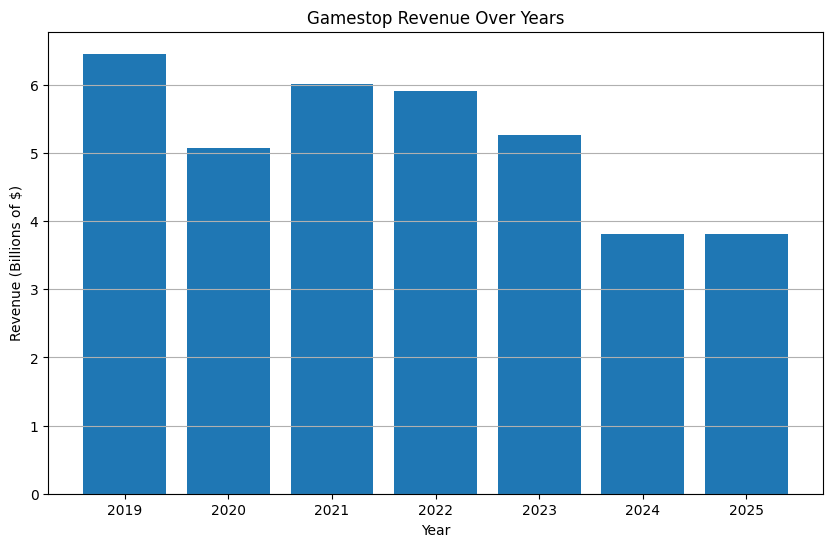

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Stock
tesla = yf.Ticker('GME')
tesla_stock = tesla.history(period='max')
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock.index, tesla_stock['Close'])
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.show()

# Revenue
revenue_data = {
    'Year': [2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Revenue ($B)': [6.46, 5.08, 6.01, 5.92, 5.27, 3.82, 3.82]
}
df_revenue = pd.DataFrame(revenue_data)
plt.figure(figsize=(10, 6))
plt.bar(df_revenue['Year'], df_revenue['Revenue ($B)'])
plt.title('Gamestop Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue (Billions of $)')
plt.grid(axis='y')
plt.show()
